# Redes convolucionais

In [1]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical, set_random_seed

import matplotlib.pyplot as plt

In [2]:
### Instantiating a small convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Importante: uma convnet recebe tensores como entrada com forma `(altura_da_imagem, largura_da_imagem, canais_da_imagem)` (não incluindo a dimensão do lote). Neste caso, configuraremos a convnet para processar entradas de tamanho `(28, 28, 1)`, que é o formato das imagens do MNIST. Faremos isso passando o argumento `input_shape=(28, 28, 1)` para a primeira camada.
Vamos exibir a arquitetura da convnet até agora:

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

A saída de cada camada `Conv2D` e `MaxPooling2D` é um tensor 3D com forma `(altura, largura, canais)`. As dimensões de largura e altura tendem a diminuir à medida que você avança na rede. O número de canais é controlado pelo primeiro argumento passado para as camadas `Conv2D` (32 ou 64).

O próximo passo é alimentar o último tensor de saída (com forma `(3, 3, 64)`) em uma rede classificadora densamente conectada, como aquelas com as quais você já está familiarizado: um conjunto de camadas `Dense`. Esses classificadores processam vetores, que são 1D, enquanto a saída atual é um tensor 3D. Primeiro, precisamos achatar as saídas 3D para 1D e depois adicionar algumas camadas `Dense` no topo.

In [4]:
### Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
### Training the convnet on MNIST images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_images, valid_images = test_images[:5000], test_images[5000:] 
train_labels, test_labels, valid_labels = to_categorical(train_labels),\
                                to_categorical(test_labels[:5000]), to_categorical(test_labels[5000:])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [6]:
hist_conv_model = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(valid_images, valid_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8675 - loss: 0.4119 - val_accuracy: 0.9806 - val_loss: 0.0693
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9844 - loss: 0.0529 - val_accuracy: 0.9958 - val_loss: 0.0166
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9895 - loss: 0.0347 - val_accuracy: 0.9964 - val_loss: 0.0122
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9954 - val_loss: 0.0149
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9964 - val_loss: 0.0139


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0476
0.9847999811172485


**Exercício**

1. Compare a acurácia deste modelo com o do modelo desenvolvido anteriormente para a mesma base de dados. Faça gráficos para mostrar a melhoria do modelo atual em relação ao anterior.

In [8]:
def plot_train_val_charts(history1, history2, model_1_label='1', model_2_label='2', save_path='', color_1='b', color_2='r'):
    """
    Compare two models training and validation loss and accuracy
    """
    history_dict1 = history1.history
    history_dict2 = history2.history
    loss_values1 = history_dict1['loss']
    val_loss_values1 = history_dict1['val_loss']
    loss_values2 = history_dict2['loss']
    val_loss_values2 = history_dict2['val_loss']
    acc1 = history1.history['accuracy']
    acc2 = history2.history['accuracy']
    val_acc1 = history1.history['val_accuracy']
    val_acc2 = history2.history['val_accuracy']
    epochs = range(1, len(acc1) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values1, f'{color_1}o', label=f'Training loss Model {model_1_label}')
    plt.plot(epochs, val_loss_values1, color_1, label=f'Validation loss Model {model_1_label}')
    plt.plot(epochs, loss_values2, f'{color_2}o', label=f'Training loss Model {model_2_label}')
    plt.plot(epochs, val_loss_values2, color_2, label=f'Validation loss Model {model_2_label}')
    plt.xticks(epochs)
    plt.title(f'Training and validation loss Model {model_1_label} vs Model {model_2_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc1, f'{color_1}o', label=f'Training acc Model {model_1_label}')
    plt.plot(epochs, val_acc1, color_1, label=f'Validation acc Model {model_1_label}')
    plt.plot(epochs, acc2, f'{color_2}o', label=f'Training acc Model {model_2_label}')
    plt.plot(epochs, val_acc2, color_2, label=f'Validation acc Model {model_2_label}')
    plt.xticks(epochs)
    plt.title(f'Training and validation accuracy Model {model_1_label} vs Model {model_2_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [9]:
# Gerando modelo da aula anterior
set_random_seed(0)
model_dropout = models.Sequential()
model_dropout.add(layers.Flatten(input_shape=((28, 28, 1))))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(10, activation='softmax'))

model_dropout.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,646 (729.09 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,324 (364.55 KB)

In [11]:
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist_old_model = model_dropout.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(valid_images, valid_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1993 - loss: 0.4265 - val_accuracy: 0.8416 - val_loss: 0.1475
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4170 - loss: 0.2408 - val_accuracy: 0.8810 - val_loss: 0.1225
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4811 - loss: 0.2205 - val_accuracy: 0.9054 - val_loss: 0.1107
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5298 - loss: 0.2088 - val_accuracy: 0.9116 - val_loss: 0.1051
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5454 - loss: 0.2047 - val_accuracy: 0.9142 - val_loss: 0.1002


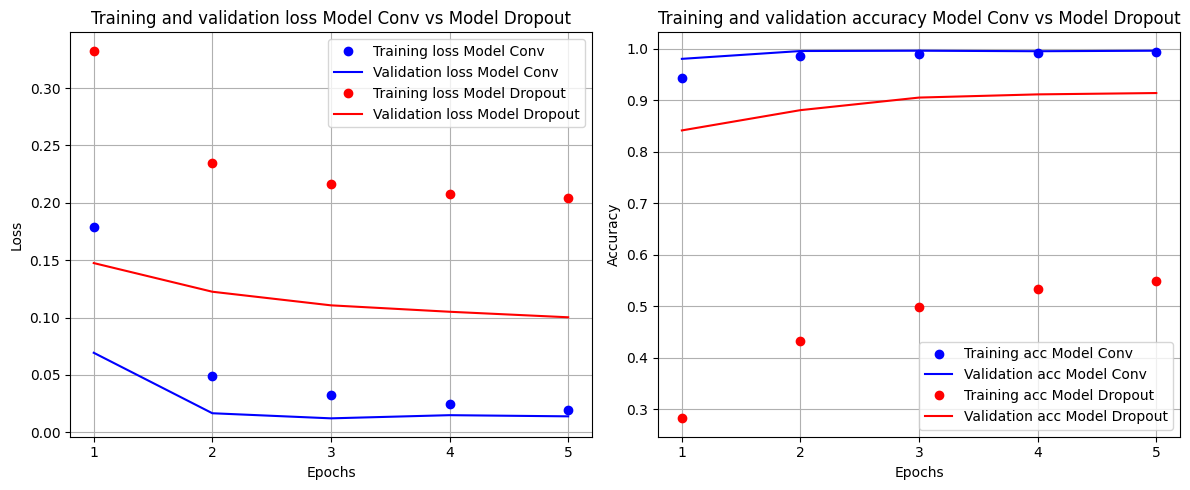

In [13]:
plot_train_val_charts(hist_conv_model, hist_old_model, 'Conv', 'Dropout', color_1='b', color_2='r', save_path='./imgs/conv_vs_dropout.png')

In [14]:
model.evaluate(test_images, test_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0476


[0.042765967547893524, 0.9847999811172485]

In [15]:
model_dropout.evaluate(test_images, test_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.1249


[0.12740667164325714, 0.8555999994277954]

#### Análise:

O modelo com redes convolucionais apresentou uma acurácia significativamente maior em relação ao modelo anterior no conjunto de dados de teste. A acurácia do modelo anterior foi de 0.85, enquanto a acurácia do modelo com redes convolucionais foi de 0.98.

2. Retire as camadas de MaxPooling2D e compare o resultado do modelo com o do modelo anterior; 

In [16]:
### Instantiating a small convnet
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_no_max_pool.add(layers.Flatten())
model_no_max_pool.add(layers.Dense(64, activation='relu'))
model_no_max_pool.add(layers.Dense(10, activation='softmax'))

In [17]:
model_no_max_pool.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,038,922 (7.78 MB)

 Trainable params: 2,038,922 (7.78 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_no_max_pool.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
hist_no_max_pool = model_no_max_pool.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(valid_images, valid_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.9131 - loss: 0.2862 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9864 - loss: 0.0468 - val_accuracy: 0.9886 - val_loss: 0.0321
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9952 - val_loss: 0.0187
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.9950 - val_loss: 0.0187
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9942 - val_loss: 0.0245


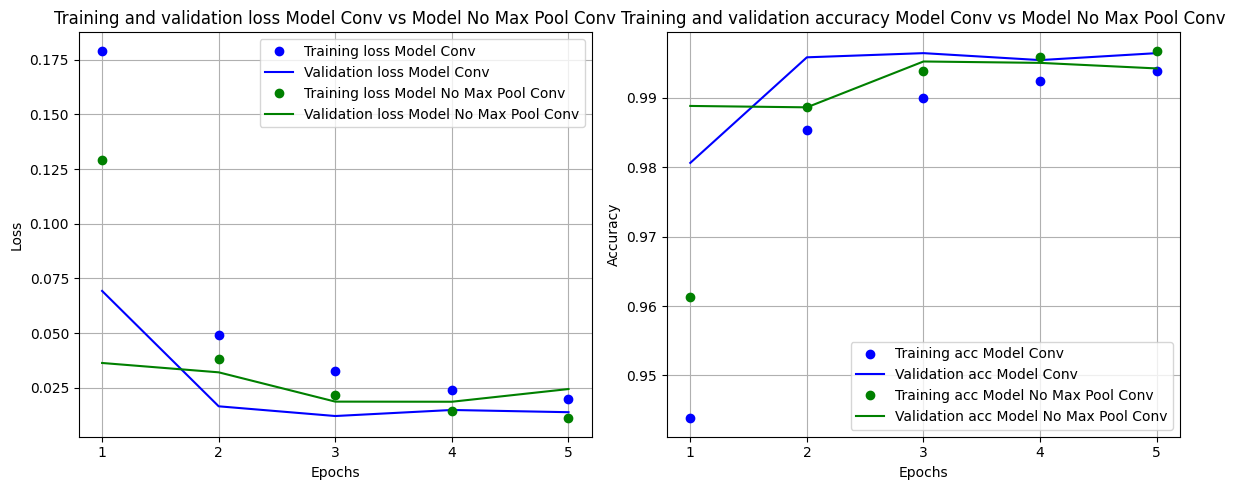

In [20]:
plot_train_val_charts(hist_conv_model, hist_no_max_pool, 'Conv', 'No Max Pool Conv', color_1='b', color_2='g', save_path='./imgs/conv_vs_no_max_pool.png')

In [21]:
model_no_max_pool.evaluate(test_images, test_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9834 - loss: 0.0843


[0.10215664654970169, 0.9811999797821045]

#### Análise:

O modelo sem as camadas de MaxPooling2D demorou significativaente mais para treinar e apresentou uma acurácia menor em relação ao modelo com as camadas de MaxPooling2D. A acurácia do modelo sem as camadas de MaxPooling2D foi de 0.97, enquanto a acurácia do modelo com as camadas de MaxPooling2D foi de 0.98.

| Modelo | Acurácia | Tempo de Treinamento |
|--------|----------|----------------------|
| Com MaxPooling2D | 0.984 | 27s |
| Sem MaxPooling2D | 0.983 | 2min20s |

3. Em vez de MaxPooling2D, use AveragePooling2D e compare o resultado do modelo com o do modelo anterior.

In [22]:
model_avg_pool2d = models.Sequential()
model_avg_pool2d.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_avg_pool2d.add(layers.AveragePooling2D((2, 2)))
model_avg_pool2d.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_avg_pool2d.add(layers.AveragePooling2D((2, 2)))
model_avg_pool2d.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_avg_pool2d.add(layers.Flatten())
model_avg_pool2d.add(layers.Dense(64, activation='relu'))
model_avg_pool2d.add(layers.Dense(10, activation='softmax'))

In [23]:
model_avg_pool2d.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_avg_pool2d.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
hist_avg_pool2d = model_avg_pool2d.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(valid_images, valid_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8540 - loss: 0.4617 - val_accuracy: 0.9880 - val_loss: 0.0369
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9784 - loss: 0.0726 - val_accuracy: 0.9938 - val_loss: 0.0199
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9868 - loss: 0.0457 - val_accuracy: 0.9950 - val_loss: 0.0153
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9909 - loss: 0.0336 - val_accuracy: 0.9966 - val_loss: 0.0135
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9930 - loss: 0.0260 - val_accuracy: 0.9958 - val_loss: 0.0135


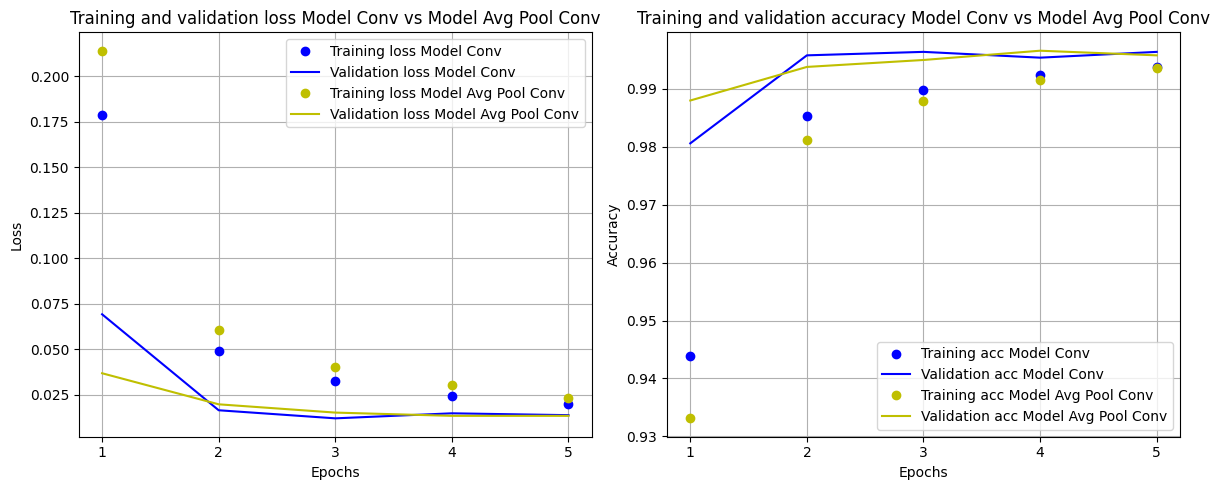

In [26]:
plot_train_val_charts(hist_conv_model, hist_avg_pool2d, 'Conv', 'Avg Pool Conv', color_1='b', color_2='y', save_path='./imgs/conv_vs_avg_pool.png')

In [27]:
model_avg_pool2d.evaluate(test_images, test_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0341


[0.03728112578392029, 0.9873999953269958]

#### Análise:

O modelo com AveragePooling2D apresentou uma acurácia levemente maior em relação ao modelo com MaxPooling2D e um tempo de treinamento 88% maior

| Modelo | Acurácia | Tempo de Treinamento |
|--------|----------|----------------------|
| Com MaxPooling2D | 0.984 | 27s |
| Com AveragePooling2D | 0.987 | 51s |